In [1]:
import scvelo as scv
import scanpy as sc
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [156]:
adata = scv.read('/media/chang/HDD-2/chang/avm_ec.h5ad')

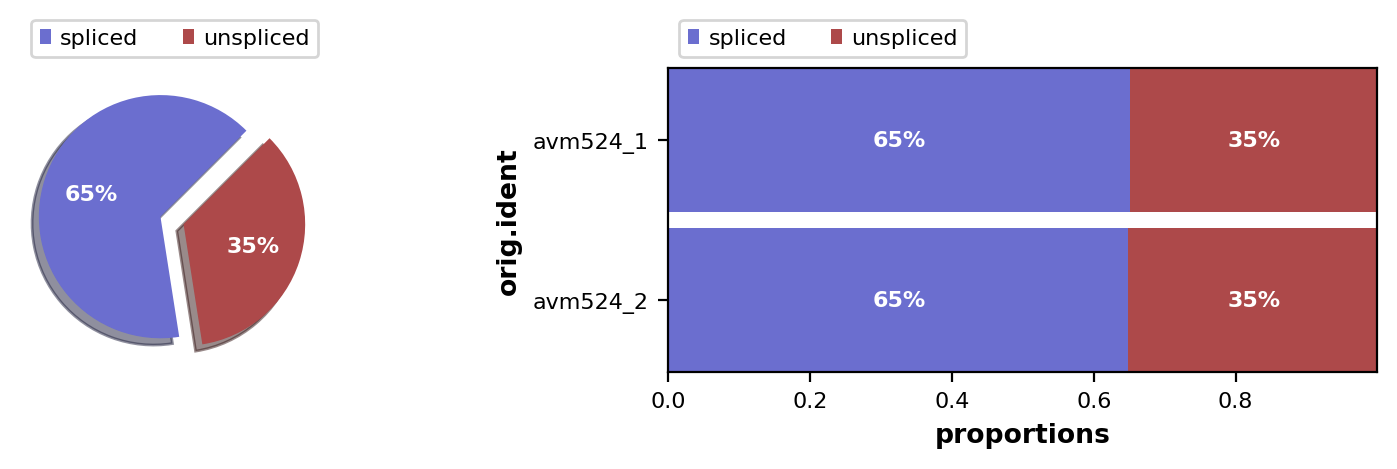

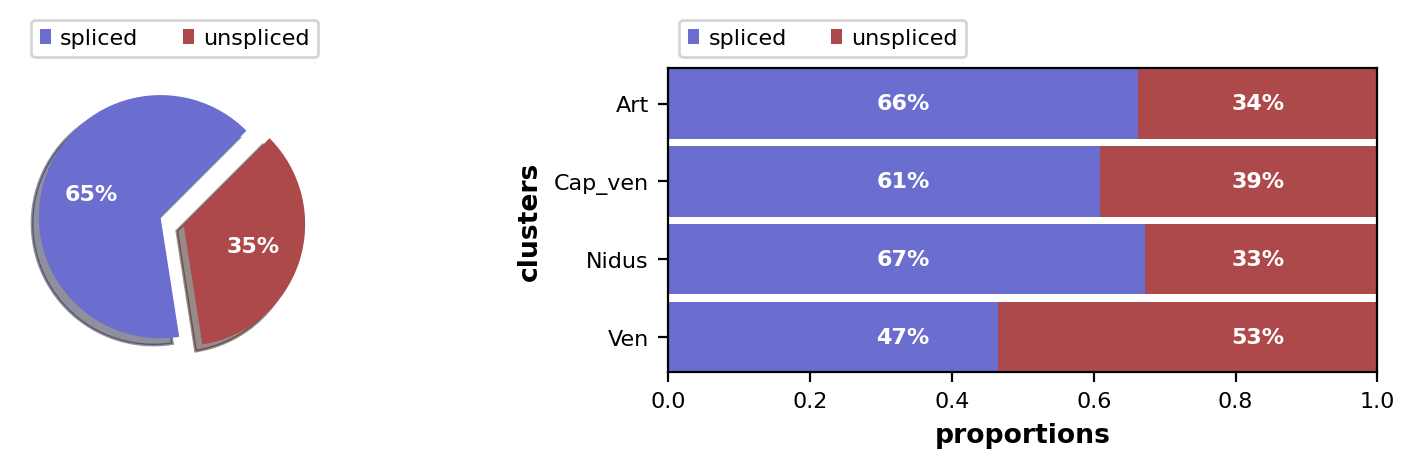

In [157]:
scv.pl.proportions(adata, groupby='orig.ident')
adata.obs['clusters'] = adata.obs['clusters'].astype('category')
scv.pl.proportions(adata, groupby='clusters')

In [158]:
scv.pp.filter_and_normalize(adata, min_shared_counts=5, n_top_genes=3000, enforce=True)

Filtered out 48227 genes that are detected 5 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.


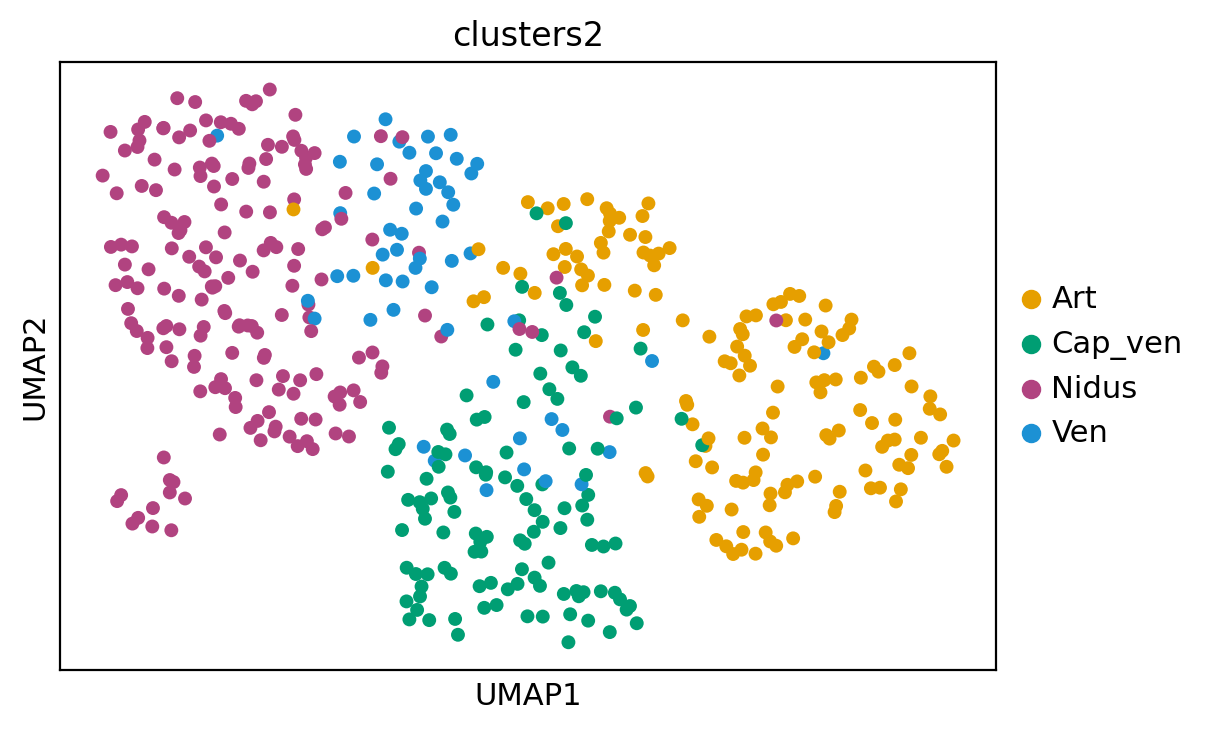

In [172]:
#scv.pp.moments(adata, n_pcs=20, n_neighbors=20)
sc.tl.umap(adata, min_dist=.7, spread=.5)
sc.pl.umap(adata, color=['clusters2'], size=100)

In [160]:
scv.tl.recover_dynamics(adata, n_jobs=32)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 32/128 cores)


  0%|          | 0/666 [00:00<?, ?gene/s]

    finished (0:00:03) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


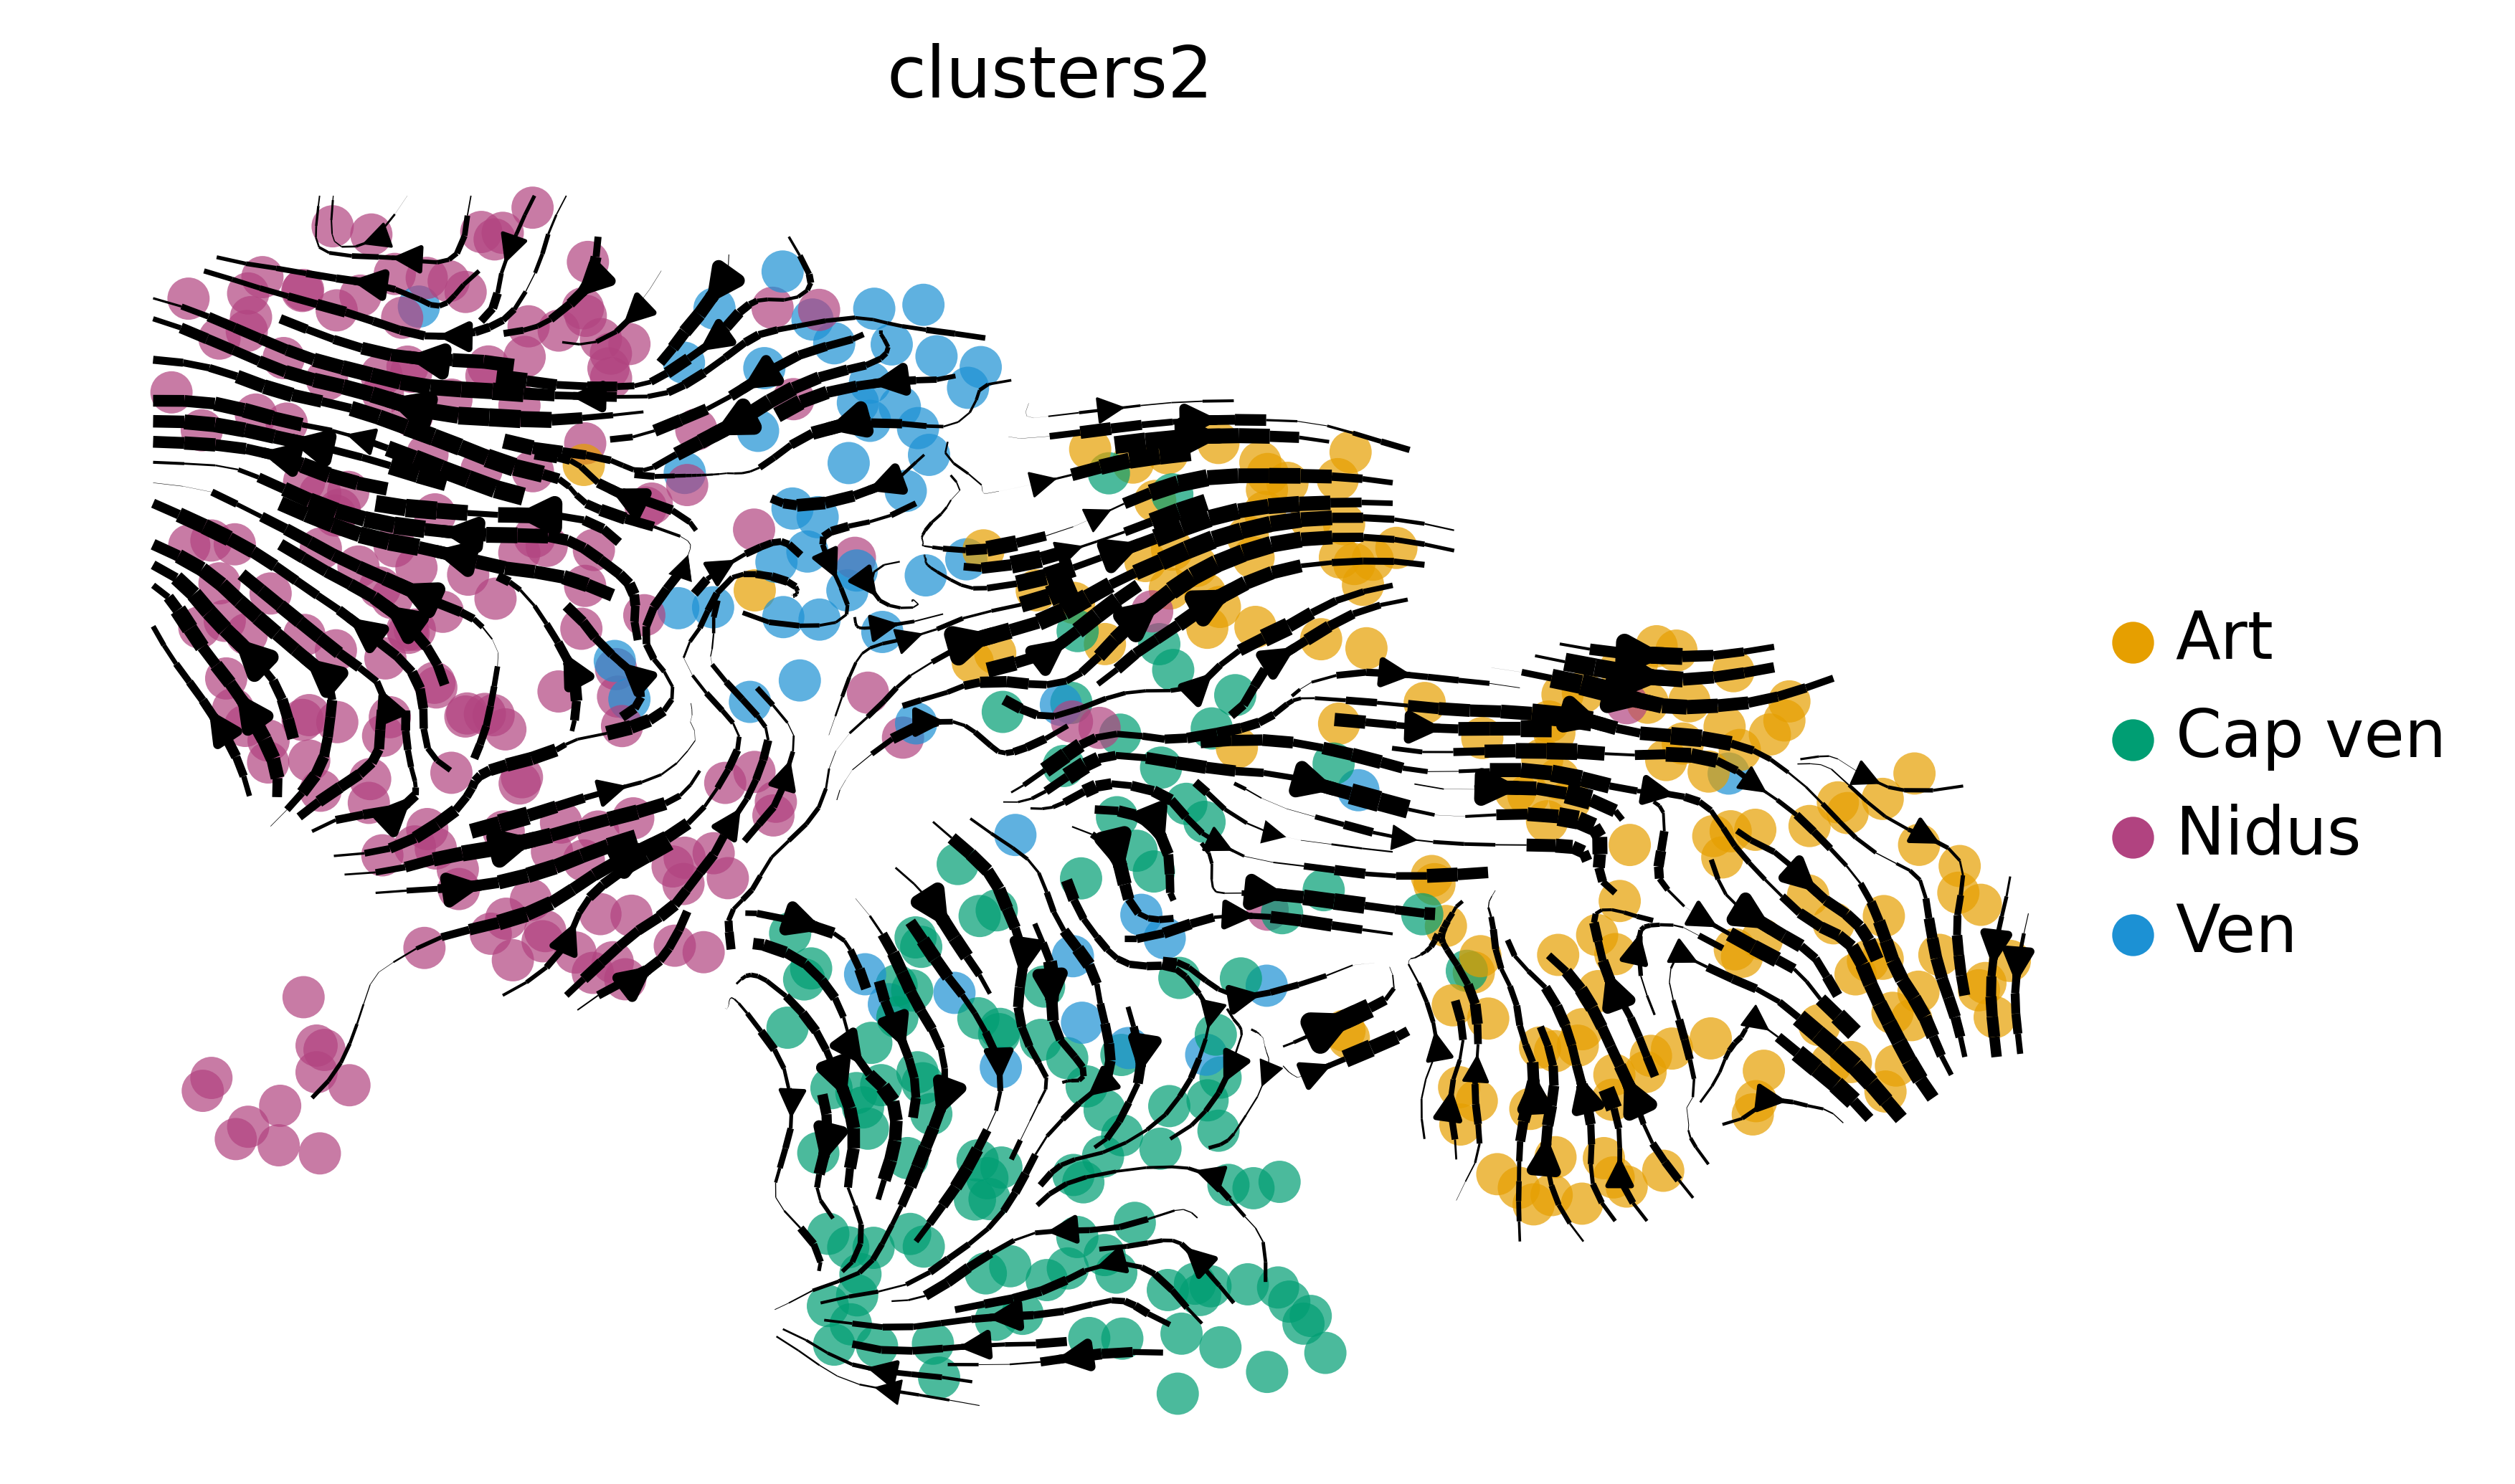

In [195]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=300, linewidth=2,  alpha=.7, size=200,color='clusters2', palette=["#E69F00", "#009E73", "#B14380", "#1C91D4"],frameon=False,xlim=(0,10), ylim=(0,8))#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


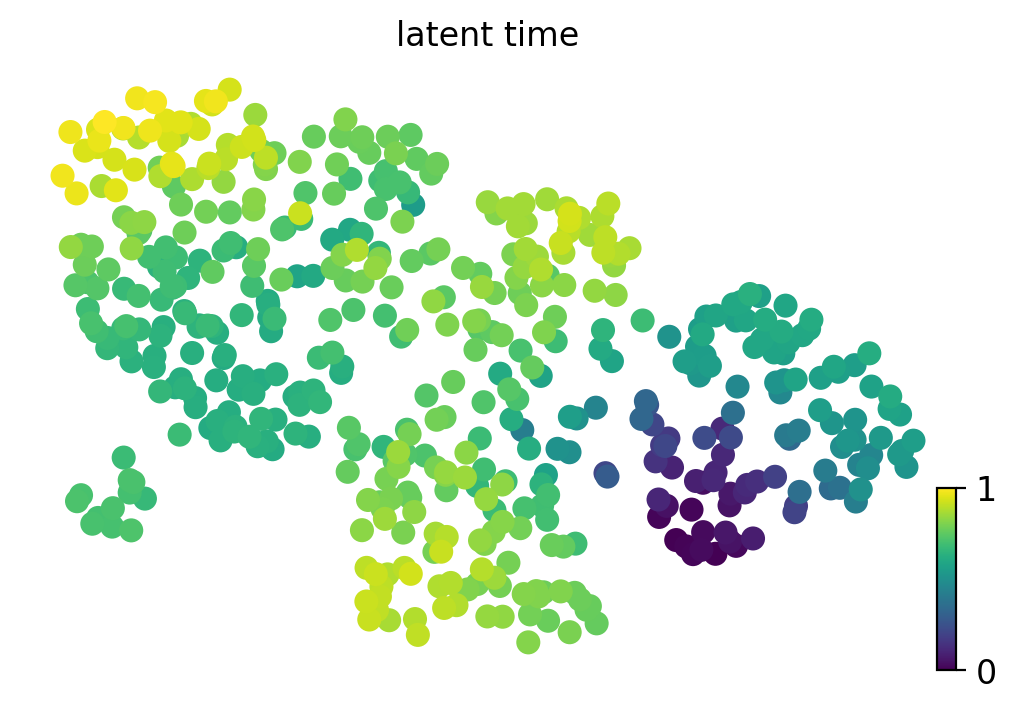

In [182]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='viridis', size=300)

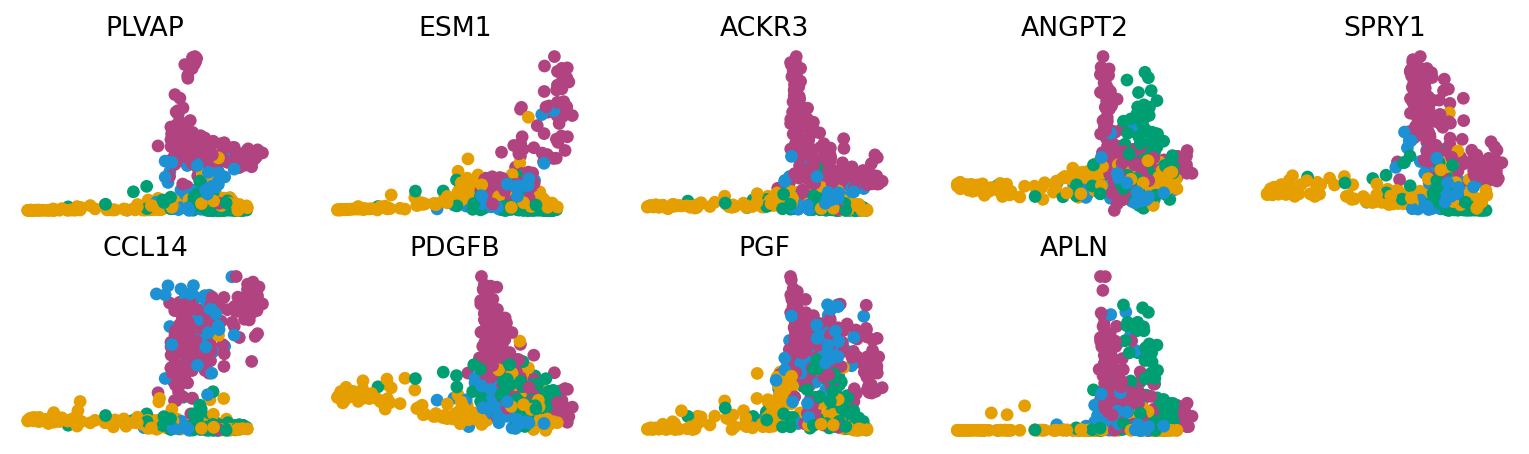

In [240]:
scv.pl.scatter(adata, x='latent_time', y=["PLVAP",'ESM1',"ACKR3","ANGPT2","SPRY1","CCL14",'PDGFB','PGF',"APLN",""],color='clusters2',frameon=False, nrows=2, palette=["#E69F00", "#009E73", "#B14380", "#1C91D4"])

In [165]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:50]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters2')

testing for differential kinetics
    finished (0:00:01) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pval_kinetics', p-values of differential kinetics (adata.var)


In [166]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


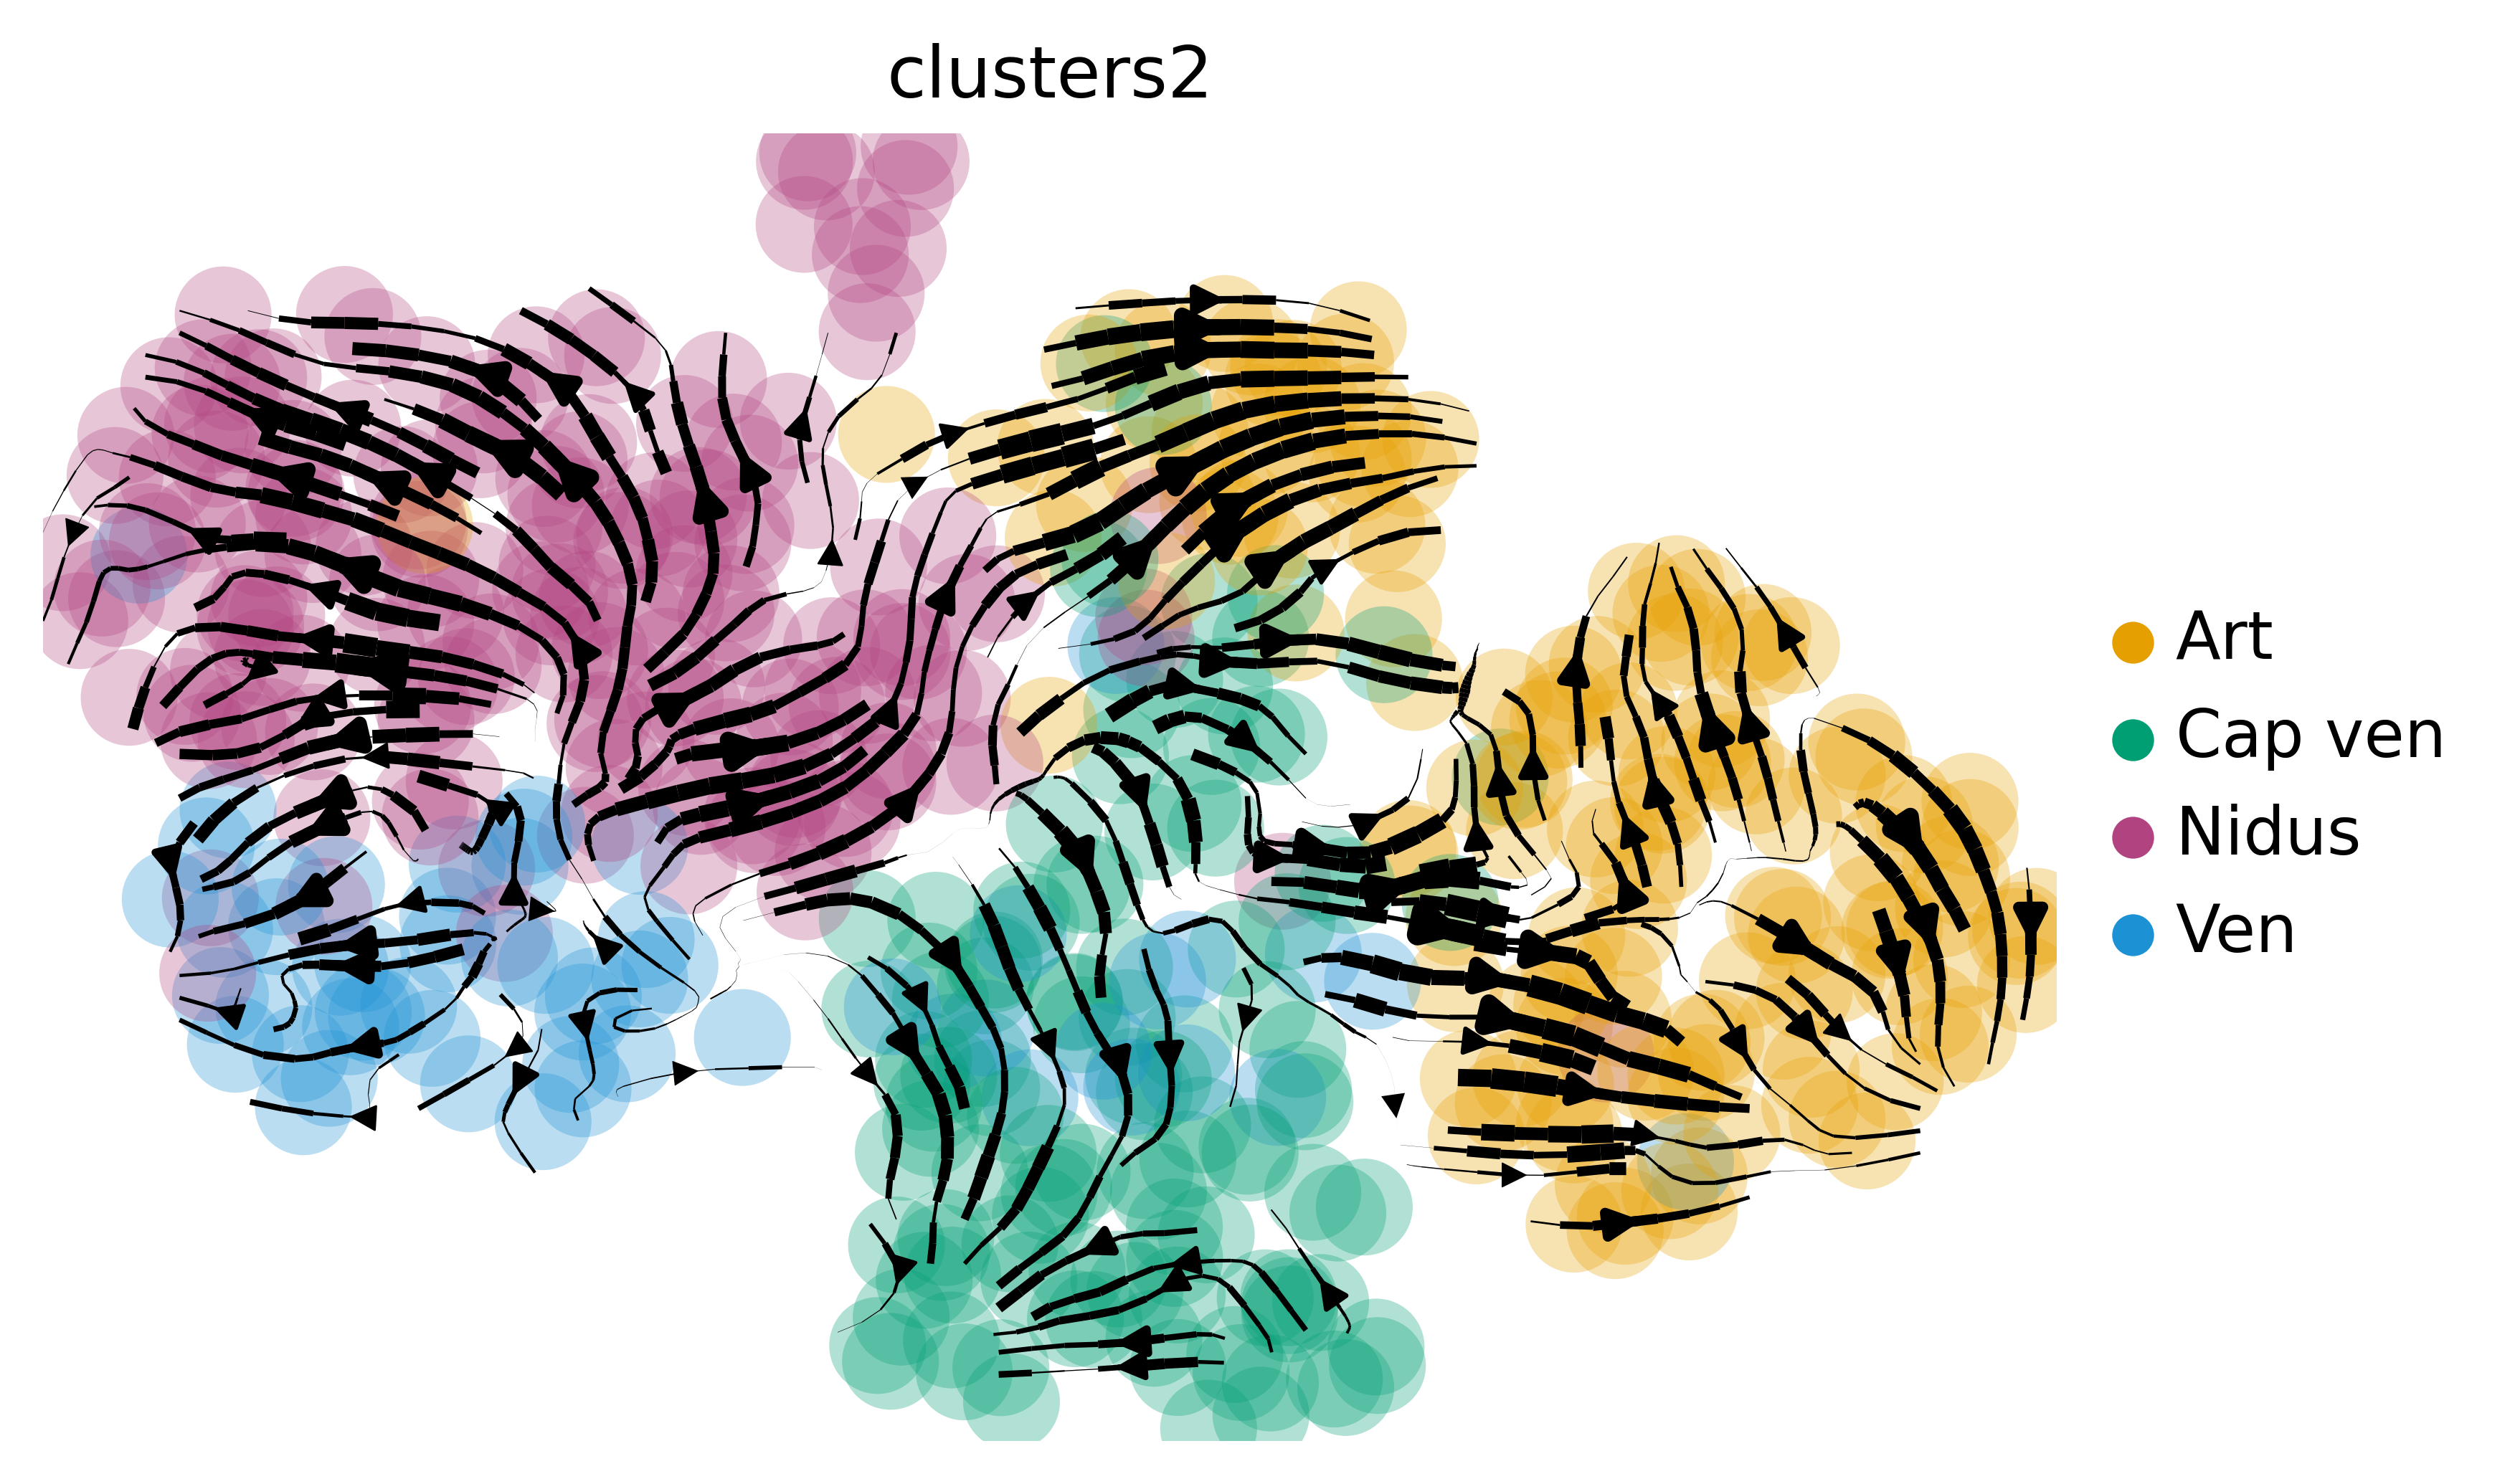

In [167]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=300, linewidth=2, color='clusters2', palette=["#E69F00", "#009E73", "#B14380", "#1C91D4"])#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

In [203]:
top_genes

Index(['FCGR1B', 'CD55', 'SYT1', 'MFSD2A', 'ACTN2', 'H1FX-AS1', 'DUXAP9',
       'ENSG00000261659', 'FCGBP', 'HEY2', 'C8orf31', 'SLC7A5', 'HIPK2',
       'SERPINA3', 'SELP', 'MEI1', 'MET', 'MT1M', 'ITGA6', 'ABCA8', 'KCNE3',
       'IGFBP5', 'ARID5B', 'ACKR3', 'LINC01235', 'SPINK8', 'ADGRF5', 'SPRY1',
       'PARP8', 'SLC45A4', 'COL8A1', 'FLRT2', 'CTTNBP2', 'MCTP1', 'RSPO3',
       'PHACTR3', 'LEF1', 'ID4', 'CGNL1', 'LTBP4', 'SULF1', 'PODXL', 'MATN3',
       'F2R', 'AAK1', 'HLF', 'ARHGAP18', 'TSLP', 'PLVAP', 'SMIM3'],
      dtype='object', name='index')

In [219]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[100:200]
top_genes

Index(['MCF2L', 'MGLL', 'HRH1', 'IL1R1', 'ALG14', 'CHRM3', 'KLF6', 'FBLN1',
       'DEPP1', 'CYTH1', 'HMOX1', 'AKR1C1', 'PLPP1', 'ENSG00000242861',
       'HSPB8', 'EFNB2', 'QPCT', 'POU2F2', 'YPEL2', 'GGT5', 'SLC52A3',
       'OLFML3', 'LHFPL6', 'STX7', 'ZC3HAV1', 'CELF2', 'IL33', 'MSMP', 'PRDM1',
       'PTPRB', 'EPHA3', 'SP110', 'FN1', 'SH3TC1', 'SYDE1', 'ZNF641', 'DCLK1',
       'PDGFB', 'ENSG00000236283', 'KCNJ2', 'RFLNB', 'SLC2A1', 'EPS15',
       'C19orf44', 'NPIPB5', 'MEDAG', 'SLC1A1', 'ALOX5', 'NUAK1', 'ADGRE2',
       'KIAA1217', 'FGF2', 'COL4A1', 'HERC2P2', 'ZNF366', 'MAOA', 'C1orf54',
       'LRP8', 'ABCA1', 'FABP5', 'SOX17', 'TPST2', 'ZSWIM6', 'GJA5', 'MYC',
       'SLC16A1', 'ANKRA2', 'EGFR', 'SMAD9', 'ZBTB16', 'FOS', 'YOD1', 'PRKACB',
       'INHBB', 'APOLD1', 'PARP9', 'TMEM178A', 'UTRN', 'FAM214B', 'EDNRB',
       'PCDH17', 'ADAMTS9', 'RCAN1', 'CSRNP3', 'ZFP36', 'SLC16A14', 'HEG1',
       'ANKS1A', 'FCN3', 'FMO2', 'MRTFB', 'NOTCH4', 'PREX2', 'PGM2L1', 'LTC4S',
       'SL

In [226]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[200:300]
top_genes

Index(['BCDIN3D', 'FAM162B', 'CDCA7L', 'SLC2A3', 'WSB1', 'ARFGEF3', 'LCN6',
       'SERPINE2', 'TENT5A', 'TGFBRAP1', 'IL1RN', 'FAM110D', 'PARP12',
       'RICTOR', 'MAP1B', 'SLCO2B1', 'AFF3', 'TMEM44', 'ZNF267', 'ST8SIA6',
       'PCSK7', 'VIP', 'SPAG9', 'SCARB1', 'GPD1L', 'FRMD4B', 'PLCB4',
       'SELENOV', 'FILIP1', 'HERC2P3', 'ENC1', 'HERC2P9', 'CNTNAP3B', 'ELAVL3',
       'SPARCL1', 'ATP1A1', 'ICA1', 'ELL2', 'DSP', 'ITPR3', 'NEBL', 'BMP2',
       'ENSG00000285669', 'ESM1', 'ADAMTS5', 'TRPM6', 'KLHL24', 'SLC26A2',
       'SLC22A14', 'GABRE', 'LGALS3', 'PGF', 'ELOVL7', 'CDH11', 'KCNJ6',
       'IFNGR1', 'CETP', 'CXCL11', 'BIRC3', 'PTPRG', 'FAM210A', 'TMEM204',
       'STOM', 'HOPX', 'KIAA1549', 'NCOA7', 'TACC1', 'DDR2', 'PDXK', 'RNF144B',
       'ATAD2', 'CCDC84', 'MT1L', 'EDN3', 'C6orf118', 'CA2', 'PART1', 'ABLIM1',
       'LMBR1', 'PHLDA2', 'USP54', 'ATOH8', 'IL32', 'NR2F1', 'SHROOM1',
       'SOCS3', 'GEM', 'TSSC2', 'FGR', 'DUSP22', 'IKBKB', 'NOS3', 'MAP4K2',
       'ANXA11', 'DS